# News Classification and Sentiment Analysis

In this notebook, we'll be analyzing a news data set from this website (https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/)

tl;dr:

Libraries used:
* ```sklearn``` specifically ```PassiveAggressiveClassifier``` among many more
* ```re```
* The VADER lexicon
* and many more standard libraries

Key Takeaways:
* We trained a PassiveAgressiveClassifier and achieved an accuracy of about 94% (with precision and recall ~93%)
* Preformed sentiment analysis and saw that FAKE articles were the usually the most positive or negative articles present in the dataset

Things I Learned:
* Fake news is really scary and often seems real
* How much choice of model impacts accuracy

In [218]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [219]:
news_filepath=r"C:\Users\am513\Desktop\LinkedIn\DataSciPortfolio\news.csv"
news=pd.read_csv(news_filepath)
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this ...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of pol...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a ...",REAL
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. \n— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race the...",FAKE
4,875,The Battle of New York: Why This Primary Matters,"It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.\n\nTrump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., ...",REAL


We see the data frame has 4 columns: ```Unnamed:0```, the ID of the row; ```title```, the title of the article; ```text```, the text of the article; and ```label```, whether the article is real or fake news.

In [220]:
labels=news["label"]
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

We'll use sklearn to split the test and training data using ```train_test_split```

In [221]:
X_train,X_test,y_train,y_test=train_test_split(news["text"],labels,test_size=0.2)

Next, we'll remove those pesky stop words and use ```TfidfVectorizer``` to get our data into a format that we can fit the model to.

In [222]:
vector=TfidfVectorizer(stop_words='english', max_df=0.7)
vector_train=vector.fit_transform(X_train) 
vector_test=vector.transform(X_test)

For our model, we are going to use ```PassiveAggressiveClassifier```. This model is well suited to this dataset because it is not feasible to run other more computationally strenuous models. We'll play around with different models in a little bit.

In [223]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(vector_train,y_train)
y_pred=pac.predict(vector_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.84%


~94% isn't bad. Let's take a look at a confusion matrix and some other figures to see how well the model is actually doing.

Confusion matrix, without normalization
[[611  35]
 [ 43 578]]
Normalized confusion matrix
[[0.94582043 0.05417957]
 [0.06924316 0.93075684]]


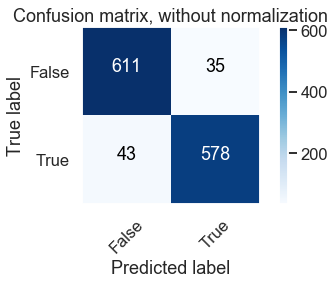

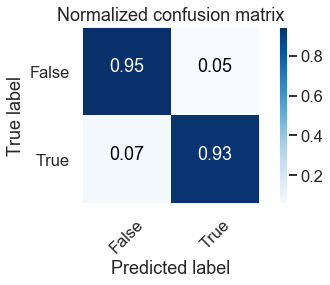

In [224]:
cnf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Let's take a look at the precision and recall

In [225]:
def score_precision(actual,pred,labels):
    confused=confusion_matrix(actual,pred, labels=labels)
    print("The precision is", confused[1][1]/(confused[1][1]+confused[0][1]))
    
def score_recall(actual,pred,labels):
    confused=confusion_matrix(actual,pred, labels=labels)
    print("The recall is", confused[1][1]/(confused[1][1]+confused[1][0]))

In [226]:
score_precision(y_test,y_pred, labels=['FAKE','REAL'])

The precision is 0.9429037520391517


In [227]:
score_recall(y_test,y_pred, labels=['FAKE','REAL'])

The recall is 0.9307568438003221


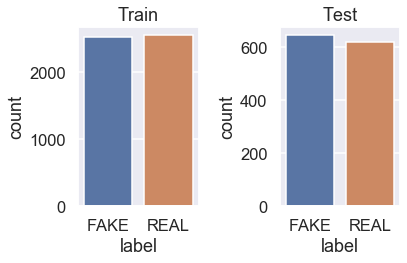

In [228]:
fig, axes = plt.subplots(1, 2)
sns.countplot(x=y_train, ax=axes[0]);
sns.countplot(x=y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();

Just to make sure, we'll try out a couple of other classifiers

In [229]:
dtc=DecisionTreeClassifier(max_depth=50)
dtc.fit(vector_train,y_train)
y_pred=dtc.predict(vector_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 81.61%


In [230]:
rfc=RandomForestClassifier(max_depth=50)
rfc.fit(vector_train,y_train)
y_pred=rfc.predict(vector_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.87%


In [231]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(vector_train,y_train)
y_pred=knn.predict(vector_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 57.3%


Seems like out original choice was the best one. 

# Sentiment Analysis

Sentiment analysis time! We will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon to analyze the sentiment of the news articles.

In [232]:
news_copy=news.copy()
news_copy.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this ...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of pol...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a ...",REAL
3,10142,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. \n— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race the...",FAKE
4,875,The Battle of New York: Why This Primary Matters,"It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.\n\nTrump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., ...",REAL


We'll start by cleaning the data using regex and getting it read to use VADER

In [233]:
news_copy["title"]=news_copy["title"].str.lower()
news_copy["text"]=news_copy["text"].str.lower()
news_copy.head()

,Unnamed: 0,title,text,label
0,8476,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this ...",FAKE
1,10294,watch the exact moment paul ryan committed political suicide at a trump rally (video),google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr \nthere are two fundamental truths in this world: paul ryan desperately wants to be president. and paul ryan will never be president. today proved it. \nin a particularly staggering example of pol...,FAKE
2,3608,kerry to go to paris in gesture of sympathy,"u.s. secretary of state john f. kerry said monday that he will stop in paris later this week, amid criticism that no top american officials attended sunday’s unity march against terrorism.\n\nkerry said he expects to arrive in paris thursday evening, as he heads home after a ...",REAL
3,10142,bernie supporters on twitter erupt in anger against the dnc: 'we tried to warn you!',"— kaydee king (@kaydeeking) november 9, 2016 the lesson from tonight's dem losses: time for democrats to start listening to the voters. stop running the same establishment candidates. \n— people for bernie (@people4bernie) november 9, 2016 if dems didn't want a tight race the...",FAKE
4,875,the battle of new york: why this primary matters,"it's primary day in new york and front-runners hillary clinton and donald trump are leading in the polls.\n\ntrump is now vowing to win enough delegates to clinch the republican nomination and prevent a contested convention. but sens.ted cruz, r-texas, bernie sanders, d-vt., ...",REAL


In [234]:
no_punc="[^\w\s]"
news_copy["text_no_punc"]=news_copy["text"].str.replace(no_punc," ")
news_copy["title_no_punc"]=news_copy["title"].str.replace(no_punc," ")
news_copy.head()

,Unnamed: 0,title,text,label,text_no_punc,title_no_punc
0,8476,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this ...",FAKE,daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam \nin the final stretch of the election hillary rodham clinton has gone to war with the fbi \nthe word unprecedented has been thrown around so often this ...,you can smell hillary s fear
1,10294,watch the exact moment paul ryan committed political suicide at a trump rally (video),google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr \nthere are two fundamental truths in this world: paul ryan desperately wants to be president. and paul ryan will never be president. today proved it. \nin a particularly staggering example of pol...,FAKE,google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr \nthere are two fundamental truths in this world paul ryan desperately wants to be president and paul ryan will never be president today proved it \nin a particularly staggering example of pol...,watch the exact moment paul ryan committed political suicide at a trump rally video
2,3608,kerry to go to paris in gesture of sympathy,"u.s. secretary of state john f. kerry said monday that he will stop in paris later this week, amid criticism that no top american officials attended sunday’s unity march against terrorism.\n\nkerry said he expects to arrive in paris thursday evening, as he heads home after a ...",REAL,u s secretary of state john f kerry said monday that he will stop in paris later this week amid criticism that no top american officials attended sunday s unity march against terrorism \n\nkerry said he expects to arrive in paris thursday evening as he heads home after a ...,kerry to go to paris in gesture of sympathy
3,10142,bernie supporters on twitter erupt in anger against the dnc: 'we tried to warn you!',"— kaydee king (@kaydeeking) november 9, 2016 the lesson from tonight's dem losses: time for democrats to start listening to the voters. stop running the same establishment candidates. \n— people for bernie (@people4bernie) november 9, 2016 if dems didn't want a tight race the...",FAKE,kaydee king kaydeeking november 9 2016 the lesson from tonight s dem losses time for democrats to start listening to the voters stop running the same establishment candidates \n people for bernie people4bernie november 9 2016 if dems didn t want a tight race the...,bernie supporters on twitter erupt in anger against the dnc we tried to warn you
4,875,the battle of new york: why this primary matters,"it's primary day in new york and front-runners hillary clinton and donald trump are leading in the polls.\n\ntrump is now vowing to win enough delegates to clinch the republican nomination and prevent a contested convention. but sens.ted cruz, r-texas, bernie sanders, d-vt., ...",REAL,it s primary day in new york and front runners hillary clinton and donald trump are leading in the polls \n\ntrump is now vowing to win enough delegates to clinch the republican nomination and prevent a contested convention but sens ted cruz r texas bernie sanders d vt ...,the battle of new york why this primary matters


In [235]:
no_n='\n'
news_copy["text_no_n"]=news_copy["text_no_punc"].str.replace(no_n," ")
news_copy["title_no_n"]=news_copy["title_no_punc"].str.replace(no_n," ")
news_copy.head()

,Unnamed: 0,title,text,label,text_no_punc,title_no_punc,text_no_n,title_no_n
0,8476,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this ...",FAKE,daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam \nin the final stretch of the election hillary rodham clinton has gone to war with the fbi \nthe word unprecedented has been thrown around so often this ...,you can smell hillary s fear,daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam in the final stretch of the election hillary rodham clinton has gone to war with the fbi the word unprecedented has been thrown around so often this el...,you can smell hillary s fear
1,10294,watch the exact moment paul ryan committed political suicide at a trump rally (video),google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr \nthere are two fundamental truths in this world: paul ryan desperately wants to be president. and paul ryan will never be president. today proved it. \nin a particularly staggering example of pol...,FAKE,google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr \nthere are two fundamental truths in this world paul ryan desperately wants to be president and paul ryan will never be president today proved it \nin a particularly staggering example of pol...,watch the exact moment paul ryan committed political suicide at a trump rally video,google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr there are two fundamental truths in this world paul ryan desperately wants to be president and paul ryan will never be president today proved it in a particularly staggering example of polit...,watch the exact moment paul ryan committed political suicide at a trump rally video
2,3608,kerry to go to paris in gesture of sympathy,"u.s. secretary of state john f. kerry said monday that he will stop in paris later this week, amid criticism that no top american officials attended sunday’s unity march against terrorism.\n\nkerry said he expects to arrive in paris thursday evening, as he heads home after a ...",REAL,u s secretary of state john f kerry said monday that he will stop in paris later this week amid criticism that no top american officials attended sunday s unity march against terrorism \n\nkerry said he expects to arrive in paris thursday evening as he heads home after a ...,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monday that he will stop in paris later this week amid criticism that no top american officials attended sunday s unity march against terrorism kerry said he expects to arrive in paris thursday evening as he heads home after a we...,kerry to go to paris in gesture of sympathy
3,10142,bernie supporters on twitter erupt in anger against the dnc: 'we tried to warn you!',"— kaydee king (@kaydeeking) november 9, 2016 the lesson from tonight's dem losses: time for democrats to start listening to the voters. stop running the same establishment candidates. \n— people for bernie (@people4bernie) november 9, 2016 if dems didn't want a tight race the...",FAKE,kaydee king kaydeeking november 9 2016 the lesson from tonight s dem losses time for democrats to start listening to the voters stop running the same establishment candidates \n people for bernie people4bernie november 9 2016 if dems didn t want a tight race the...,bernie supporters on twitter erupt in anger against the dnc we tried to warn you,kaydee king kaydeeking november 9 2016 the lesson from tonight s dem losses time for democrats to start listening to the voters stop running the same establishment candidates people for bernie peopl

In [236]:
clean_news=news_copy[["Unnamed: 0","title_no_n","text_no_n","label"]].set_index("Unnamed: 0")
clean_news.head()

,title_no_n,text_no_n,label
Unnamed: 0,,,
8476,you can smell hillary s fear,daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam in the final stretch of the election hillary rodham clinton has gone to war with the fbi the word unprecedented has been thrown around so often this el...,FAKE
10294,watch the exact moment paul ryan committed political suicide at a trump rally video,google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr there are two fundamental truths in this world paul ryan desperately wants to be president and paul ryan will never be president today proved it in a particularly staggering example of polit...,FAKE
3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monday that he will stop in paris later this week amid criticism that no top american officials attended sunday s unity march against terrorism kerry said he expects to arrive in paris thursday evening as he heads home after a we...,REAL
10142,bernie supporters on twitter erupt in anger against the dnc we tried to warn you,kaydee king kaydeeking november 9 2016 the lesson from tonight s dem losses time for democrats to start listening to the voters stop running the same establishment candidates people for bernie people4bernie november 9 2016 if dems didn t want a tight race they...,FAKE
875,the battle of new york why this primary matters,it s primary day in new york and front runners hillary clinton and donald trump are leading in the polls trump is now vowing to win enough delegates to clinch the republican nomination and prevent a contested convention but sens ted cruz r texas bernie sanders d vt an...,REAL


Now that our data is clean, we'll put it into a tidy format that looks like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>690171032150237184</th>
      <td>0</td>
      <td>bigop1</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>1</td>
      <td>realdonaldtrump</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>2</td>
      <td>sarahpalinusa</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>3</td>
      <td>https</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>4</td>
      <td>t</td>
    </tr>
  </tbody>
</table>

Also, since I don't want to kill my computer doing this, we'll take a sample of the whole dataset

In [237]:
news_test=clean_news.sample(n=250)
news_test.head()

,title_no_n,text_no_n,label
Unnamed: 0,,,
4430,in rare foreign trip assad flies to moscow to meet with putin,syrian president bashar al assad ventured outside his beleaguered nation for the first time in more than four years wednesday to meet russia s vladimir putin in a surprise visit to kremlin patrons now backing syria s government with military might the landmark trip is a pow...,REAL
1231,cruz trump and rubio win in iowa and now we know who the losers are too,it is always interesting to watch democracy in action and iowa is ground zero many political pundits and media analysts complain about the attention iowa receives from candidates and the media because it goes first but it also is a state filled with people who are willing ...,REAL
8466,links 11 9 16 election day,by yves smith be sure to vote today if you haven t already even if you dislike the presidential choices downticket races are important and an overdue note thanks so much to those of you who came out to meet me in dallas last week we had a group of 30 35 attend includi...,FAKE
433,a harsh blow to small businesses opposing view,under new overtime rules employees will be injured as well the labor department s change to the overtime rule is a harsh blow to millions of small businesses and their employees according to nfib research approximately 44 of small businesses would be affected the depar...,REAL
5311,black lives matter loses america s respect for police surges,pinterest in the war between police and black lives matter the cop hating race baiters are losing a new study shows a dramatic increase in respect for law enforcement among all americans including blacks who have been repeatedly told they were the victims of a racist w...,FAKE


In [238]:
tidytext=news_test["text_no_n"].str.split(expand=True).stack().reset_index(level=1).rename(columns={"level_1":"num",0:"word"})
tidytext.head()

,num,word
Unnamed: 0,,
4430,0,syrian
4430,1,president
4430,2,bashar
4430,3,al
4430,4,assad


VADER time

In [239]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [240]:
vaderstring="vader_lexicon.txt"

sented=pd.read_csv(vaderstring,sep='\t',header=None)
sents=sented.set_index(0)[[1]]

sents.index.name=None

sent=sents.rename(columns={1:"polarity"})
sent

,polarity
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4
}:-(,-2.1


Next, let's ```merge``` our sentiments df onto our tidy formatted text and then group them so we get a polarity for each article.

In [241]:
news_test["polarity"]=tidytext.merge(sent,how="left",left_on="word",right_index=True).fillna(0).groupby(level=0).sum()["polarity"]
news_test.head()

,title_no_n,text_no_n,label,polarity
Unnamed: 0,,,,
4430,in rare foreign trip assad flies to moscow to meet with putin,syrian president bashar al assad ventured outside his beleaguered nation for the first time in more than four years wednesday to meet russia s vladimir putin in a surprise visit to kremlin patrons now backing syria s government with military might the landmark trip is a pow...,REAL,-25.1
1231,cruz trump and rubio win in iowa and now we know who the losers are too,it is always interesting to watch democracy in action and iowa is ground zero many political pundits and media analysts complain about the attention iowa receives from candidates and the media because it goes first but it also is a state filled with people who are willing ...,REAL,26.3
8466,links 11 9 16 election day,by yves smith be sure to vote today if you haven t already even if you dislike the presidential choices downticket races are important and an overdue note thanks so much to those of you who came out to meet me in dallas last week we had a group of 30 35 attend includi...,FAKE,24.6
433,a harsh blow to small businesses opposing view,under new overtime rules employees will be injured as well the labor department s change to the overtime rule is a harsh blow to millions of small businesses and their employees according to nfib research approximately 44 of small businesses would be affected the depar...,REAL,-0.5
5311,black lives matter loses america s respect for police surges,pinterest in the war between police and black lives matter the cop hating race baiters are losing a new study shows a dramatic increase in respect for law enforcement among all americans including blacks who have been repeatedly told they were the victims of a racist w...,FAKE,19.9


In [242]:
print("Most Positive Articles")
news_test.sort_values("polarity",ascending=False).head()

Most Positive Articles


,title_no_n,text_no_n,label,polarity
Unnamed: 0,,,,
9700,scrabble spells doom for the racial hypothesis of intelligence,11 27 top three nations with elite scrabble players on the wespa ratings list nigeria is on top despite constant travel visa rejections to play in world tournaments besides nigeria countries like kenya ghana and uganda also contribute players to the world top 100 an ...,FAKE,326.8
457,so how s the american middle class really,mothers lauren ioli l and julie nardi read to their children in the public library in frederick md which holds story time for children on tuesdays like other cities frederick still has many middle income jobs but they are harder to find in cincinnati steve raven h...,REAL,137.6
1351,democratic debate s reality check team inspects the claims,cnn the democratic candidates for president gathered in new hampshire thursday for their fifth debate and cnn s reality check team spent the night putting their statements and assertions to the test the team of reporters researchers and editors across cnn listened throu...,REAL,109.6
3444,audio justice scalia on black students at top schools,there are those who contend that it does not benefit african americans to get them into the university of texas where they do not do well as opposed to having them go to a less advanced school a slower track school where they do well scalia said wednesday during oral arg...,REAL,96.6
973,outsider campaigns seek inside track,cnn donald trump and bernie sanders are confronting the same paradox the fate of their insurgent campaigns built on scorn for the political establishment rests on how well they play the inside game for trump the challenge is shifting from a strategy of piling up state p...,REAL,91.5


In [243]:
print("Most Negative Articles")
news_test.sort_values("polarity",ascending=True).head()

Most Negative Articles


,title_no_n,text_no_n,label,polarity
Unnamed: 0,,,,
7622,fact check trump is right that clinton might cause ww3,artwork by anthony freda anthonyfreda com trump claims that clinton s policy on syria would lead to world war 3 let s fact check the washington post points out that a vote for clinton is a vote for escalating military confrontation in syria and elsewhere in the rare...,FAKE,-179.0
4295,the media needs to stop telling this lie about donald trump i m a sanders supporter and value honesty,back in june i first saw mr trump announcing his candidacy for president what he said about unauthorized immigrants seemed ridiculous so i laughed i showed the video to friends and i laughed again his words were poorly chosen but something worse happened people inter...,REAL,-174.6
9097,ice agent commits suicide in nyc leaves note revealing gov t plans to round up disarm americans during economic bank collapse endingfed news network,email print after writing a lengthy suicide note exposing terrifying plans the government has for american citizens a us customs agent walked onto a pier in nyc and blew his brains out sources inside the new york city police department have revealed to superstation95 the c...,FAKE,-157.4
7677,comment on sheriff says cannabis makes people murderers because rational thought leads to violence by isaid dilligaf,home be the change the state sheriff says cannabis makes people murderers because rational thought leads to violence sheriff says cannabis makes people murderers because rational thought leads to violence claire bernish may 10 2016 35 comments it isn t gang violen...,FAKE,-145.0
2723,media coverage of gang violence sure looks different when the perpetrators are white,over the weekend a shootout between three rival biker gangs at a bar in waco texas left at least nine gang members dead and 18 others hospitalized with gunshot and stab wounds it was a huge devastating tragedy the new york times reported that law enforcement sources ca...,REAL,-143.5


Let's see the distribution of sentiments for tweets containing certain words

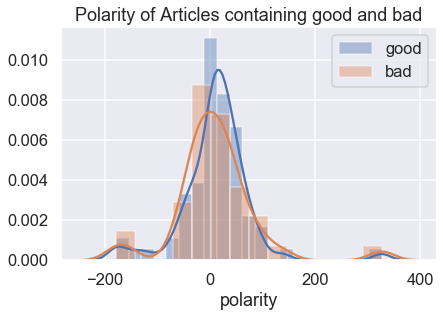

In [244]:
name1="good"
name2="bad"

word1=news_test[news_test["text_no_n"].str.contains(name1)]["polarity"]
word2=news_test[news_test["text_no_n"].str.contains(name2)]["polarity"]

sns.distplot(word1,label=name1)
sns.distplot(word2,label=name2)
plt.legend()
plt.title("Polarity of Articles containing {0} and {1}".format(name1,name2));

Now VADER isn't perfect, but it provides a really interesting glimpse at the sentiment of prose. That's all for this notebook. Check out the tl;dr at the beginning of the notebook. Thanks for reading!